# Visualisation of the stlearn diagnostic plots for the breast data: 
Namely LR ranked lists, correlation between LR expression/abundance and significance,
and correlation of cell type abundance & interactions..

INPUT: 
 * /Volumes/GML001-Q1851/Brad/breast_LR&CCIResults.h5ad
 
OUTPUT: 
 * plots/X1_X3_diagnostics/*
 
## Environment setup

In [5]:
# TODO: NOTE must be run in folder with README entitled StLearn Reproduce
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/Main_figure_6_CCI_with_Sup/'
gml_rdm_path = '/Volumes/GML001-Q1851/'
data_dir = gml_rdm_path+'Brad/'

import os, sys
os.chdir(work_dir)

import numpy as np
import scanpy as sc
import stlearn as st

import scripts.utils.visualisation.helpers as vhs
import stlearn.plotting.cci_plot as cci_plot

out_plots = 'plots/X1_X3_diagnostics/'

## Loading the data

In [2]:
data = sc.read_h5ad(data_dir+'breast_LR&CCIResults.h5ad')

# Re-labelling for consistency with the paper #
data.uns['lr_summary'].index = [lr.replace('_', '-')
                                for lr in data.uns['lr_summary'].index]
data.uns['lrfeatures'].index = [lr.replace('_', '-')
                                for lr in data.uns['lrfeatures'].index]

## General LR receptor visualisations

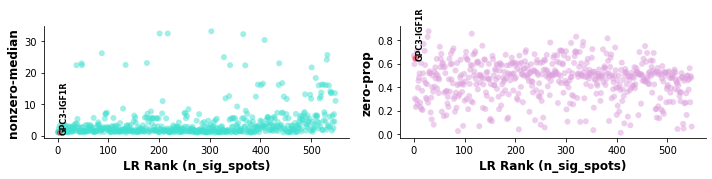

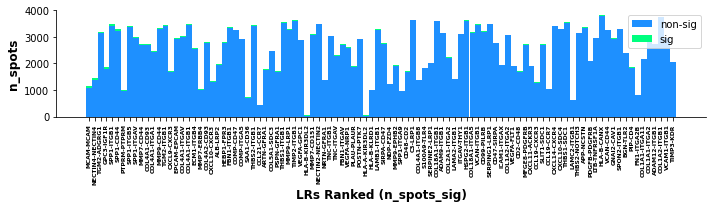

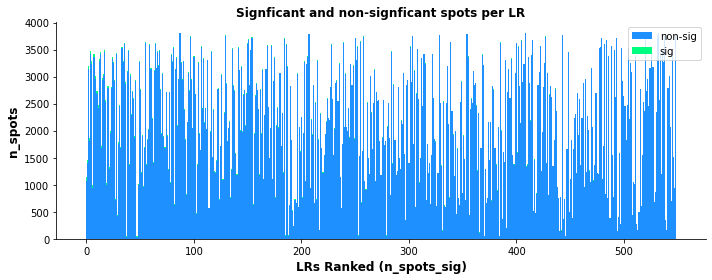

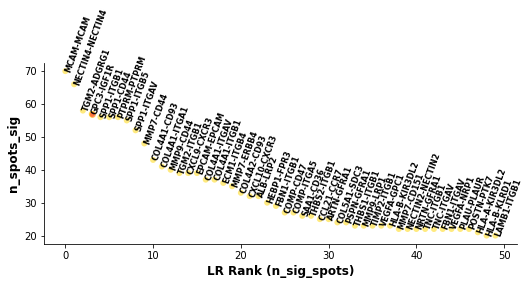

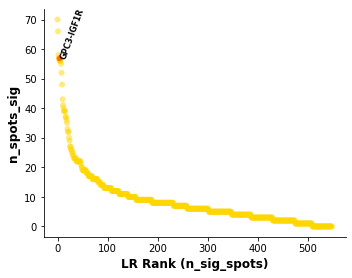

In [3]:
### Trying as an actual diagnostic ###
int_lrs = ['GPC3-IGF1R']
out='.pdf'
cci_plot.lr_diagnostics(data, highlight_lrs=int_lrs,
                        figsize=(10,2.5), show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_diagnostics{out}', 300)
cci_plot.lr_n_spots(data, n_top=100, figsize=(10, 3),
                    max_text=100, show_title=False, show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_n_spots_top{out}', 300)
cci_plot.lr_n_spots(data, n_top=10000, figsize=(10, 4), show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_n_spots{out}', 300)
cci_plot.lr_summary(data, highlight_lrs=int_lrs, n_top=50, show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_summary{out}', 300)
cci_plot.lr_summary(data, n_top=1000, highlight_lrs=int_lrs, figsize=(5,4),
                    show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_all_summary{out}', 300)

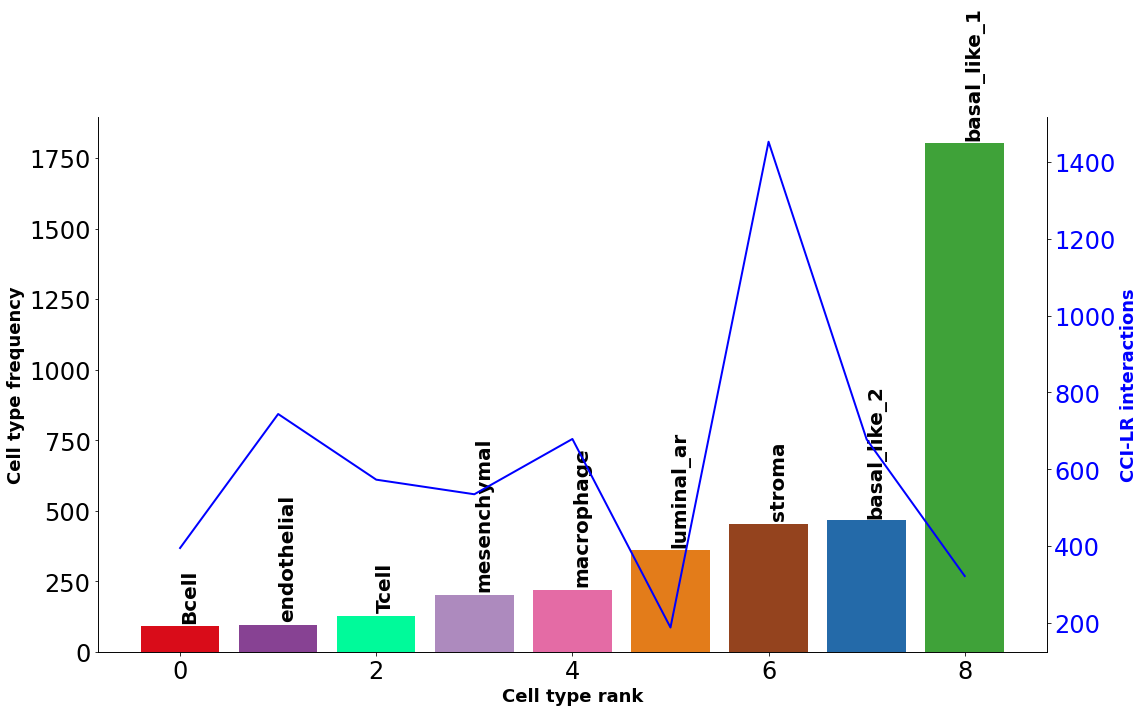

In [4]:
### Now for the CCI diagnostics ###
#### Updating the colors ######
cell_types = list( data.obs['cell_type'].cat.categories )
colors = list( data.uns['cell_type_colors'] )
colors = dict(zip( cell_types, colors ))
colors['Tcell'] = '#00FA9A'
color_swap = {'basal_like_1': 'Bcell', 'Bcell': 'basal_like_1'}
new_colors = [colors[cell_type]
              if cell_type not in color_swap else colors[color_swap[cell_type]]
              for cell_type in colors]
data.uns['cell_type_colors'] = new_colors

cci_plot.cci_check(data, 'cell_type',
				   tick_size=24, show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'cci_check{out}', 300)

## LR receptor over-representation analysis

In [ ]:
data = sc.read_h5ad(data_dir+'breast_LR&CCIResults.h5ad')

GO results saved to adata.uns['lr_go']


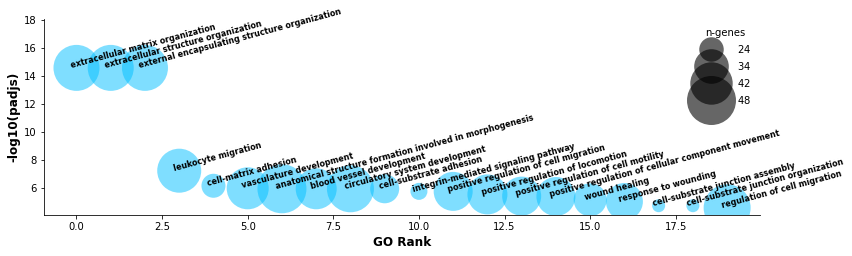

In [20]:
#### Performing the LR-GO analysis #####
r_path = "/Library/Frameworks/R.framework/Resources"
st.tl.cci.run_lr_go(data, r_path, n_top=100)

highlight_go=['ERK1 and ERK2 cascade', 'regulation of ERK1 and ERK2 cascade']
cci_plot.lr_go(data, lr_text_fp={'weight': 'bold', 'size': 8}, rot=15,
               figsize=(12,3.65), n_top=20, show=False)
vhs.dealWithPlot(True, True, True, out_plots, f'lr_go.pdf', 300)